In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR

# Example data creation (in practice, you would load this from your dataset)
dates = pd.date_range(start='2020-01-01', periods=100, freq='B')
np.random.seed(0)

# Simulate stock price data
data = pd.DataFrame({
    'Apple': np.random.randn(100).cumsum() + 100,
    'Google': np.random.randn(100).cumsum() + 150,
    'Nvidia': np.random.randn(100).cumsum() + 200,
}, index=dates)

data_orig = data.copy()

# Introduce missing values in Apple stock price data
data.loc['2020-02-01':'2020-02-10', 'Apple'] = np.nan

# Check for missing values
print(data.isna().sum())

# Prepare the data for VAR model (forward fill to handle initial NaNs if necessary)
data_filled = data.ffill().bfill()

# Fit the VAR model
model = VAR(data_filled)
results = model.fit(maxlags=15, ic='aic')

# Forecast missing values
def impute_missing_values(data, results):
    for i in range(len(data)):
        if np.isnan(data.iloc[i, 0]):  # Check if Apple stock price is NaN
            # Get the previous available data points up to the maxlags
            data_slice = data.iloc[i - results.k_ar:i].values
            if len(data_slice) == results.k_ar:
                forecast = results.forecast(data_slice, steps=1)
                data.iloc[i, 0] = forecast[0, 0]  # Impute the missing value for Apple
    return data

# Impute the missing values
imputed_data = impute_missing_values(data.copy(), results)

# Display the imputed data
print(imputed_data)

# Check if there are any NaNs left
print(imputed_data.isna().sum())


Apple     6
Google    0
Nvidia    0
dtype: int64
                 Apple      Google      Nvidia
2020-01-01  101.764052  151.883151  199.630818
2020-01-02  102.164210  150.535392  199.391439
2020-01-03  103.142948  149.264907  200.491099
2020-01-06  105.383841  150.234303  201.146362
2020-01-07  107.251399  149.061180  201.786494
...                ...         ...         ...
2020-05-13  103.655530  153.106238  193.425488
2020-05-14  103.666030  153.878029  193.523213
2020-05-15  105.451900  154.701533  194.106167
2020-05-18  105.578812  156.864769  193.706718
2020-05-19  105.980802  158.201297  194.076774

[100 rows x 3 columns]
Apple     0
Google    0
Nvidia    0
dtype: int64


In [5]:
data

,Apple,Google,Nvidia
2020-01-01,101.764052,151.883151,199.630818
2020-01-02,102.164210,150.535392,199.391439
2020-01-03,103.142948,149.264907,200.491099
2020-01-06,105.383841,150.234303,201.146362
2020-01-07,107.251399,149.061180,201.786494
...,...,...,...
2020-05-13,103.655530,153.106238,193.425488
2020-05-14,103.666030,153.878029,193.523213
2020-05-15,105.451900,154.701533,194.106167
2020-05-18,105.578812,156.864769,193.706718


<Axes: >

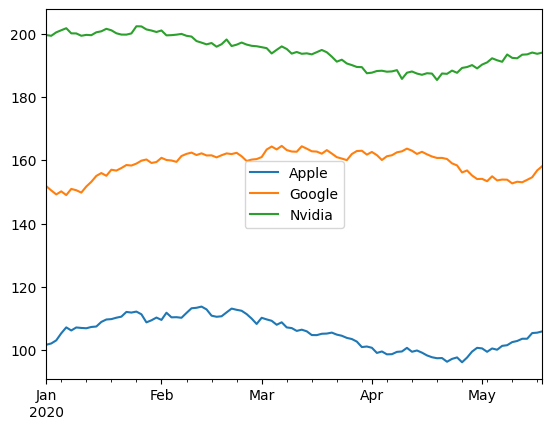

In [3]:
data_orig.plot()

<Axes: >

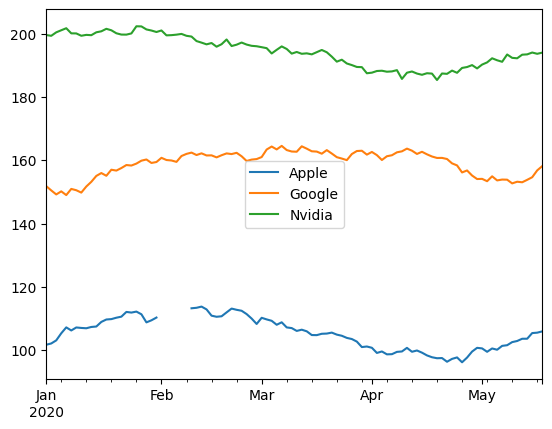

In [2]:
data.plot()

In [8]:
sum(imputed_data.Apple - data_orig.Apple)

0.2928793220263515

In [13]:
imputed_data

,Apple,Google,Nvidia
2020-01-01,101.764052,151.883151,199.630818
2020-01-02,102.164210,150.535392,199.391439
2020-01-03,103.142948,149.264907,200.491099
2020-01-06,105.383841,150.234303,201.146362
2020-01-07,107.251399,149.061180,201.786494
...,...,...,...
2020-05-13,103.655530,153.106238,193.425488
2020-05-14,103.666030,153.878029,193.523213
2020-05-15,105.451900,154.701533,194.106167
2020-05-18,105.578812,156.864769,193.706718


In [12]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(imputed_data.Apple, data_orig.Apple))
print(mean_squared_error(data.Apple.interpolate(method='linear'), data_orig.Apple))

0.035303800359665204
0.11437334142337077


In [14]:
imputed_data

,Apple,Google,Nvidia
2020-01-01,101.764052,151.883151,199.630818
2020-01-02,102.164210,150.535392,199.391439
2020-01-03,103.142948,149.264907,200.491099
2020-01-06,105.383841,150.234303,201.146362
2020-01-07,107.251399,149.061180,201.786494
...,...,...,...
2020-05-13,103.655530,153.106238,193.425488
2020-05-14,103.666030,153.878029,193.523213
2020-05-15,105.451900,154.701533,194.106167
2020-05-18,105.578812,156.864769,193.706718
